In [1]:
%reset -f
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
def savefig(filename):
    plt.savefig('outputs/{}.pdf'.format(filename))

In [3]:
# Figures configuration
width = 6
height = width / 1.618

preamble = r"\usepackage[utf8x]{inputenc}, \usepackage[T1]{fontenc}"
plt.rc('pgf', texsystem='pdflatex', preamble=preamble)
plt.rc('figure', figsize=[width, height], autolayout=True)
plt.rc('font', size=13, family='Serif')
plt.rc('text', usetex=True)
plt.rc('lines', linewidth=1.2)
plt.rc('axes.spines', top=False, right=False)
plt.rc('axes', labelsize=14, grid=False, titlesize=16, titlepad=22)
plt.rc('axes3d', grid=False)
plt.rc('xtick', direction='in', labelsize=14)
plt.rc('ytick', direction='in', labelsize=14)
plt.rc('xtick.minor', visible=True, size=4)
plt.rc('ytick.minor', visible=True, size=4)
plt.rc('xtick.major', size=7.5)
plt.rc('ytick.major', size=7.5)


## Vibrato tests for a digital option

### First Order

In [33]:
option_type = 'put' # This must be changed to `call` if a call option is chosen in C++

src = 'datasets/'+ option_type

vars1 = ['premium', 'delta', 'vega', 'rho']
vars2 = ['gamma', 'vanna', 'volga']

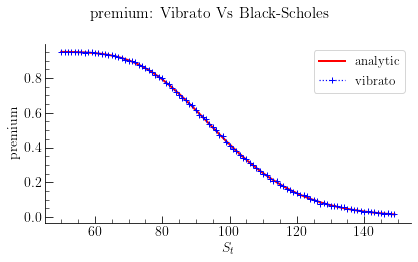

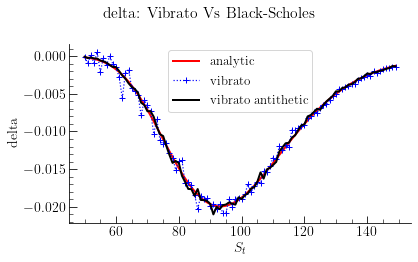

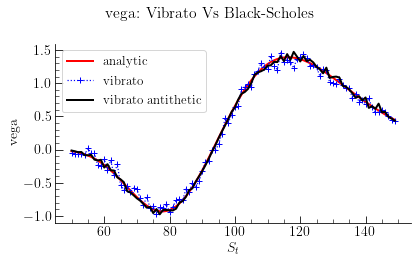

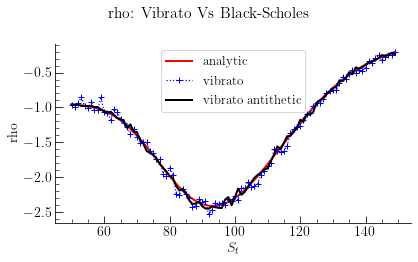

In [46]:
for v in vars1:
    analytic = pd.read_csv(
        src+'_analytic_digital_'+v+'.csv', 
        header=None, names=['$S_t$', 'analytic'],  sep=';', index_col=0
    )
    vibrato = pd.read_csv(
        src+'_vibrato_digital_'+v+'.csv', 
        header=None, names=['$S_t$', 'vibrato'], sep=';', index_col=0
    )

    fig, ax= plt.subplots();
    fig.suptitle(v+': Vibrato Vs Black-Scholes');
    analytic.plot(ax=ax, color='red', lw=2);
    vibrato.plot(ax=ax, ylabel=v, color='blue', ls='dotted', marker='+', markersize=6);
    
    if v != 'premium':
        vibrato_anti = pd.read_csv(
            src+'_vibrato_digital_'+v+'_anti.csv', 
            header=None, names=['$S_t$', 'vibrato antithetic'], sep=';', index_col=0
        )
        vibrato_anti.plot(ax=ax, color='black', lw=2);
    savefig(v+"_vib_digital")

### Second order

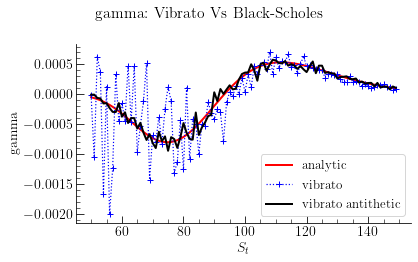

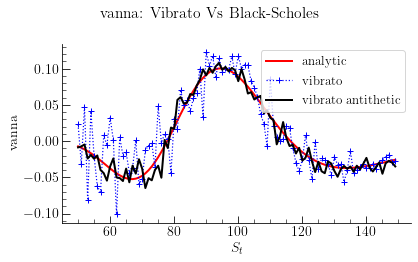

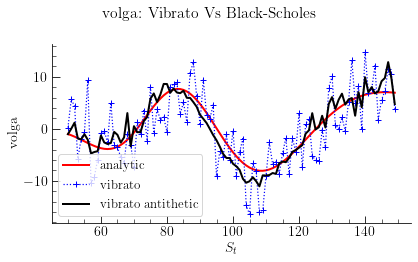

In [47]:
for v in vars2:
    analytic = pd.read_csv(
        src+'_analytic_digital_'+v+'.csv', 
        header=None, names=['$S_t$', 'analytic'],  sep=';', index_col=0
    )
    vibrato = pd.read_csv(
        src+'_vibrato_digital_'+v+'.csv', 
        header=None, names=['$S_t$', 'vibrato'], sep=';', index_col=0
    )
    vibrato_anti = pd.read_csv(
        src+'_vibrato_digital_'+v+'_anti.csv', 
        header=None, names=['$S_t$', 'vibrato antithetic'], sep=';', index_col=0
    )
    fig, ax= plt.subplots();
    fig.suptitle(v+': Vibrato Vs Black-Scholes');
    analytic.plot(ax=ax, color='red', lw=2);
    vibrato.plot(ax=ax, ylabel=v, color='blue', ls='dotted', marker='+', markersize=6);
    vibrato_anti.plot(ax=ax, color='black', lw=2);
    savefig(v+"_vib_digital")

## Vibrato with automatic differentiation


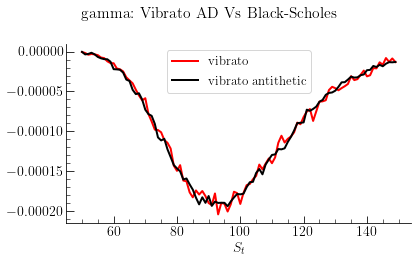

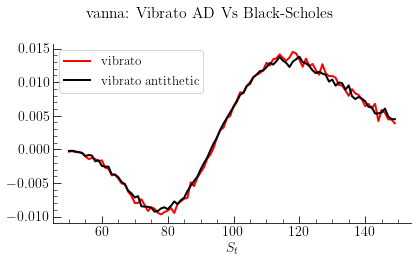

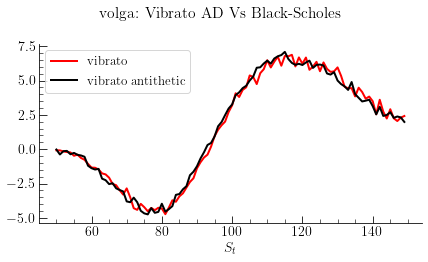

In [49]:
for v in vars2:
    analytic = pd.read_csv(
        src+'_analytic_digital_ad_'+v+'.csv', 
        header=None, names=['$S_t$', 'analytic'],  sep=';', index_col=0
    )
    vibrato = pd.read_csv(
        src+'_vibrato_digital_ad_'+v+'.csv', 
        header=None, names=['$S_t$', 'vibrato'], sep=';', index_col=0
    )
    vibrato_anti = pd.read_csv(
        src+'_vibrato_digital_ad_'+v+'_anti.csv', 
        header=None, names=['$S_t$', 'vibrato antithetic'], sep=';', index_col=0
    )
    fig, ax= plt.subplots();
    fig.suptitle(v+': Vibrato AD Vs Black-Scholes');
    analytic.plot(ax=ax, ylabel=v, color='blue', ls='', marker='+', markersize=6);
    vibrato.plot(ax=ax, color='red', lw=2);
    vibrato_anti.plot(ax=ax, color='black', lw=2);
    savefig(v+"_vad_digital")